In [1]:
#importam llibreries
import numpy as np
import matplotlib.pyplot as plt

FUNCTIONS

In [2]:
def RHS_Vanderpol(t,w,parameters): #eqs Vanderpol
    v = w[1]
    x = w[0]
    f_x = v 
    mu = parameters[0]
    f_v =  mu*(1-x**2)*v - x
    return np.array([f_x,f_v])

In [3]:
def RHS_FHN(t,w,par): #eqs FHN
    y = w[1]
    x = w[0]
    a = par[0]
    eps = par[1]
    f_x = x- x**3/3 - y
    f_y = eps*(x-a) #EN EL RESTO DE FHNs de Maria Rosa está como x+a
    return np.array([f_x,f_y])

In [4]:
def rk(func,parameters, K_pasos, Samp, t_i, w_i):  #funció que fa RK i torna el resultat i els vectors
    h = parameters[-1]
    t = t_i
    w = w_i  
    TR = np.zeros(((len(w)+1), int(np.ceil(K_pasos/Samp))))  #matriu buida amb columnes per a cada vector i el temps i files depenent de la relació entre passes i les que volem guardar

    i = 0  #contador
    
    for j in range(0,K_pasos):
        k1 = h * func(t,w,parameters)                     #RK 2n ordre
        k2 = h * func(t + h/2, w + k1/2,parameters)
        
        t = t + h
        w = w + k2 

        if j % Samp == 0:   #if the remainder is 0, guardam els vectors a la seva columna
            TR[0,i] = t  
            TR[1,i] = w[0]
            TR[2,i] = w[1]
            i += 1
    return TR , w , t #torna la matriu i els vectors

Parameters and initial conditions

In [5]:
a = -1.1 #vector amb diferents valors de a propers a 1
eps = 0.01 #epsilon
h = 0.01   #pas 

K_pasos1 = int(3e4)   
Samp = 10 #cada quant volem guardar
t_i = 0 #temps inicial

#valors inicials (put ic 1,0.6 closet to SS for a=1)
x_i = 0.1
y_i = 0 

#good for xxxx valors inicials (put ic 1,0.6 closet to SS for a=1)
#x_i = 1 
#y_i = 0.6 


w_i = np.array([x_i,y_i]) #vector amb els valors inicials

#bucle per a que faci el càlcul per a cada a
parameters = np.array([a , eps, h])  #vector amb els paràmetres a, epsilon i h


Runge-Kutta second order

In [6]:
[TR , w_f, t_f] = rk(RHS_FHN, parameters, K_pasos1 , Samp, t_i ,w_i)    #matriu i vector resultants dels valors inicials

Nullclines 

In [7]:
# graficar la recta i la cúbica
Y = np.zeros(100)
X = np.zeros(100)
i  = 0
linx = np.linspace(-2.5,2.5,100)
liny = np.linspace(-6,6,100) 
for x in linx:
    y = x-x**3/3
    Y[i] = y
    X[i] = a
    i+=1     

Flowlike graph with arrows

In [8]:
x_array_arrow=np.linspace(-2.5,2.5,12)
y_array_arrow=np.linspace(-6,6,12)


#x_array_arrow=np.linspace(-2.5,2.5,128)
#y_array_arrow=np.linspace(-6,6,128)


x_grid_arrow, y_grid_arrow = np.meshgrid(x_array_arrow, y_array_arrow)


PLOTTING

In [9]:
%matplotlib widget

<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:31: SyntaxWarning: invalid escape sequence '\d'
<>:40: SyntaxWarning: invalid escape sequence '\d'
<>:42: SyntaxWarning: invalid escape sequence '\d'
<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:31: SyntaxWarning: invalid escape sequence '\d'
<>:40: SyntaxWarning: invalid escape sequence '\d'
<>:42: SyntaxWarning: invalid escape sequence '\d'
C:\Users\magic\AppData\Local\Temp\ipykernel_3608\2506970552.py:29: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel('$\dot{x}$',fontsize = 18)
C:\Users\magic\AppData\Local\Temp\ipykernel_3608\2506970552.py:31: SyntaxWarning: invalid escape sequence '\d'
  ax.set_title('$\dot{x}$ vs t',fontsize = 18)
C:\Users\magic\AppData\Local\Temp\ipykernel_3608\2506970552.py:40: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel('$\dot{y}$',fontsize = 18)
C:\Users\magic\AppData\Local\Temp\ipykernel_3608\2506970552.py:42: SyntaxWarning: invalid escape sequence '\d'
  ax.set_title(

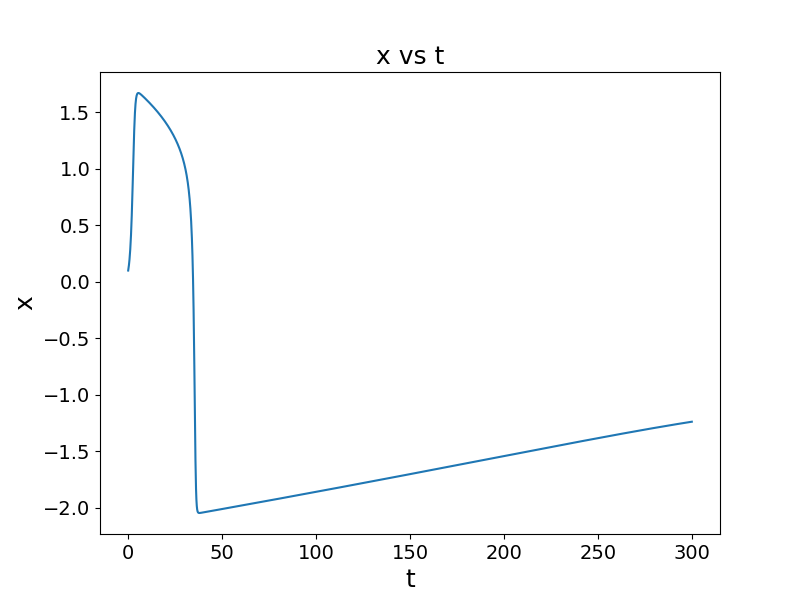

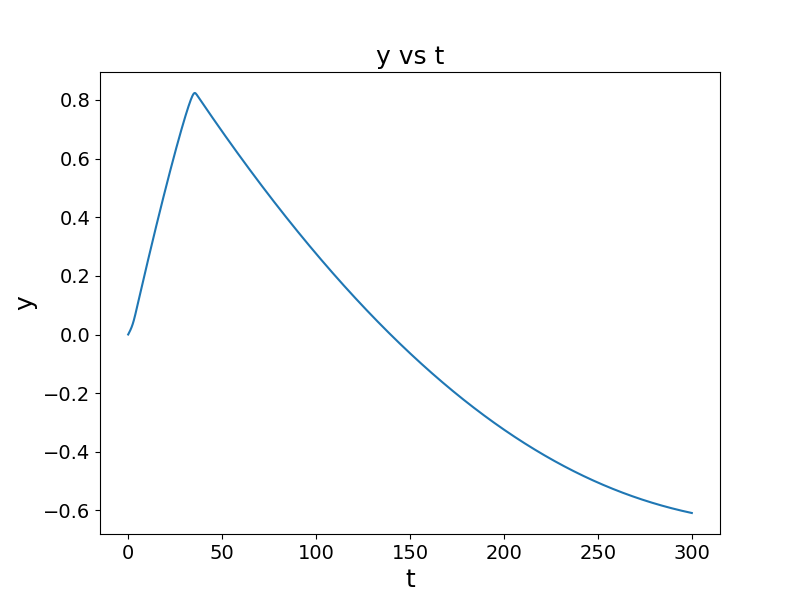

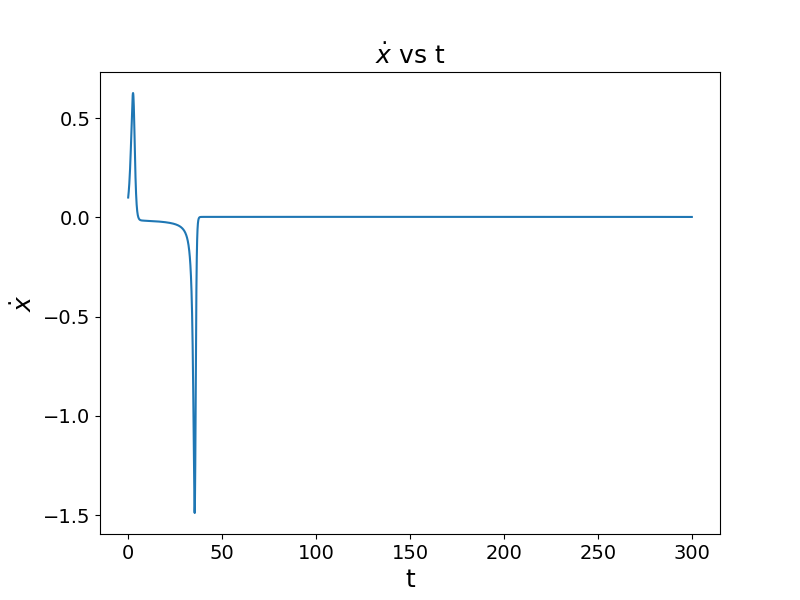

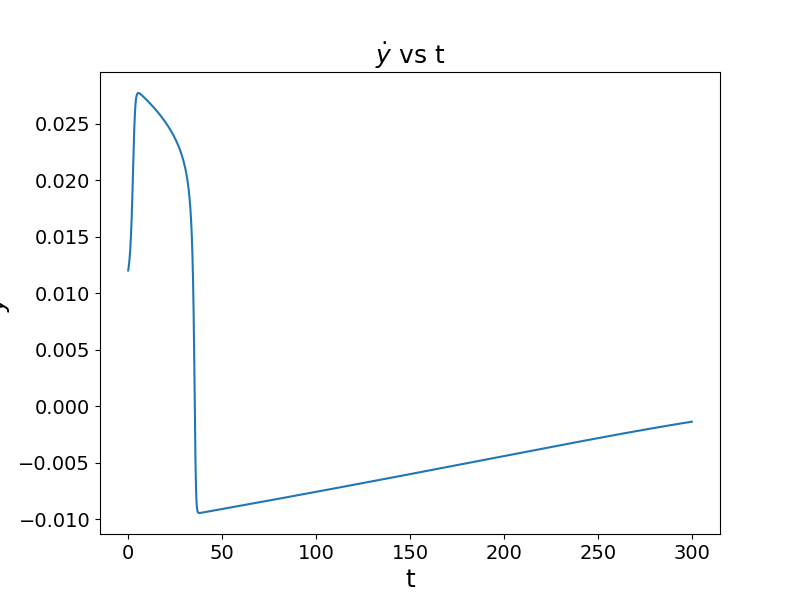

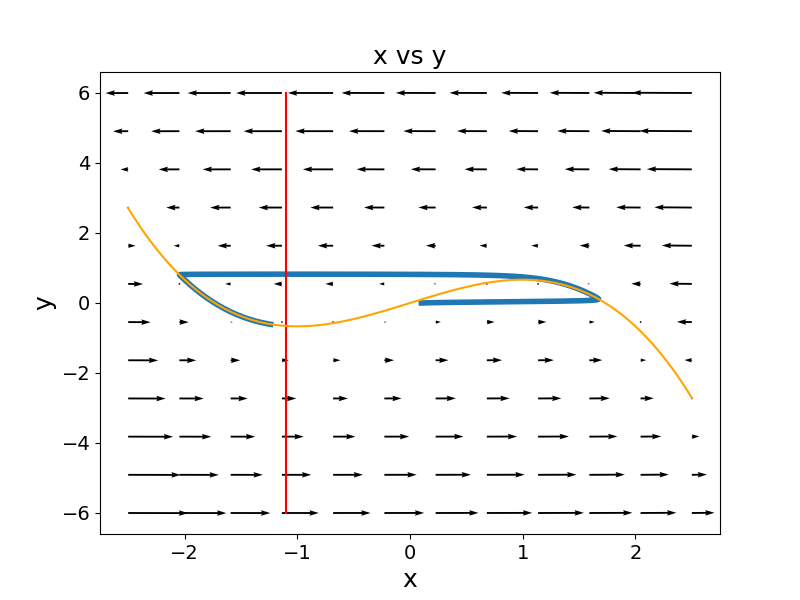

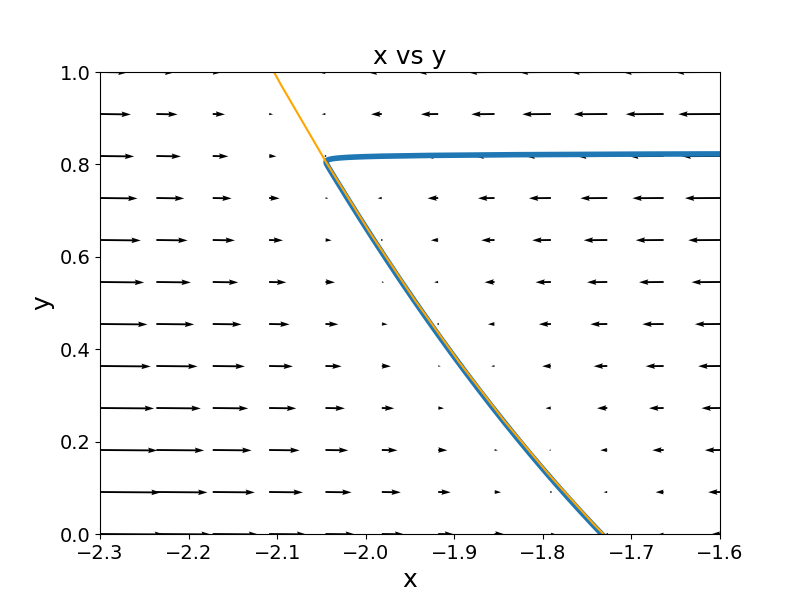

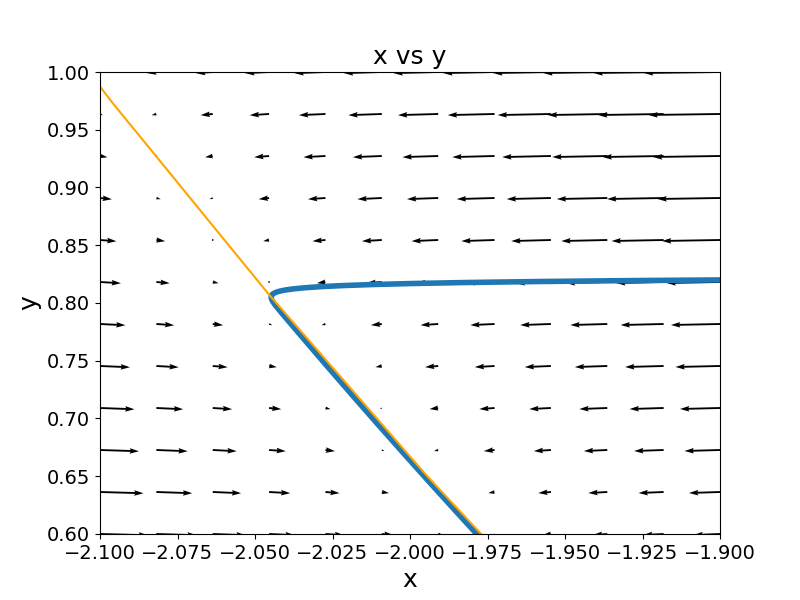

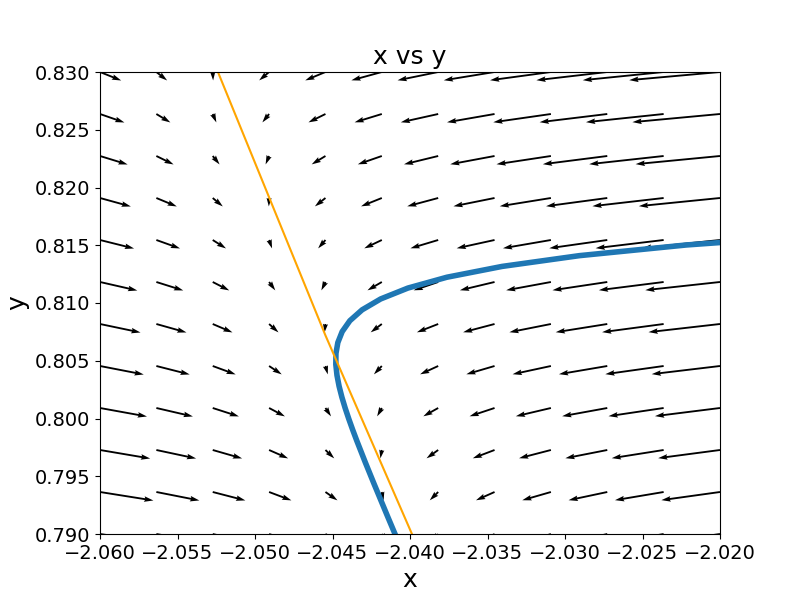

In [10]:

fig, ax = plt.subplots( figsize=(8,6))



ax.plot(TR[0],TR[1])
ax.grid(False)
ax.set_ylabel('x', fontsize = 18 )
ax.set_xlabel('t',fontsize = 18)
ax.set_title('x vs t', fontsize = 18)
ax.tick_params(axis='y', labelsize = 14) 
ax.tick_params(axis='x', labelsize = 14) 
plt.show()

fig, ax = plt.subplots( figsize=(8,6))

ax.plot(TR[0],TR[2])
ax.grid(False)
ax.set_ylabel('y',fontsize = 18)
ax.set_xlabel('t',fontsize = 18)
ax.set_title('y vs t',fontsize = 18)
ax.tick_params(axis='y', labelsize = 14) 
ax.tick_params(axis='x', labelsize = 14) 
plt.show()

fig, ax = plt.subplots( figsize=(8,6))

ax.plot(TR[0],TR[1]-(TR[1]**3)/3-TR[2])
ax.grid(False)
ax.set_ylabel('$\dot{x}$',fontsize = 18)
ax.set_xlabel('t',fontsize = 18)
ax.set_title('$\dot{x}$ vs t',fontsize = 18)
ax.tick_params(axis='y', labelsize = 14) 
ax.tick_params(axis='x', labelsize = 14) 
plt.show()

fig, ax = plt.subplots( figsize=(8,6))

ax.plot(TR[0],eps*(TR[1]-a))
ax.grid(False)
ax.set_ylabel('$\dot{y}$',fontsize = 18)
ax.set_xlabel('t',fontsize = 18)
ax.set_title('$\dot{y}$ vs t',fontsize = 18)
ax.tick_params(axis='y', labelsize = 14) 
ax.tick_params(axis='x', labelsize = 14) 

plt.show()

fig, ax = plt.subplots( figsize=(8,6))

x_array_arrow=np.linspace(-2.5,2.5,12)
y_array_arrow=np.linspace(-6,6,12)
x_grid_arrow, y_grid_arrow = np.meshgrid(x_array_arrow, y_array_arrow)
ax.plot(TR[1], TR[2],linewidth=4)
ax.plot(X,liny,c='r')
ax.plot(linx,Y,c='orange')
ax.grid(False)
ax.quiver(x_grid_arrow,y_grid_arrow,x_grid_arrow- x_grid_arrow**3/3 - y_grid_arrow,eps*(x_grid_arrow-a),scale=90,width=0.003)
ax.set_ylabel('y',fontsize = 18)
ax.set_xlabel('x',fontsize = 18)
ax.set_title('x vs y',fontsize = 18)
ax.tick_params(axis='y', labelsize = 14) 
ax.tick_params(axis='x', labelsize = 14) 
plt.show()

fig, ax = plt.subplots( figsize=(8,6))


x_array_arrow=np.linspace(-2.3,-1.6,12)
y_array_arrow=np.linspace(0,1,12)
x_grid_arrow, y_grid_arrow = np.meshgrid(x_array_arrow, y_array_arrow)
ax.plot(TR[1], TR[2],linewidth=4)
ax.plot(X,liny,c='r')
ax.plot(linx,Y,c='orange')
ax.set_xlim(-2.3,-1.6)
ax.set_ylim(0,1)
ax.grid(False)
ax.quiver(x_grid_arrow,y_grid_arrow,x_grid_arrow- x_grid_arrow**3/3 - y_grid_arrow,eps*(x_grid_arrow-a),scale=17,width=0.003)
ax.set_ylabel('y',fontsize = 18)
ax.set_xlabel('x',fontsize = 18)
ax.set_title('x vs y',fontsize = 18)
ax.tick_params(axis='y', labelsize = 14) 
ax.tick_params(axis='x', labelsize = 14) 
plt.show()

fig, ax = plt.subplots( figsize=(8,6))

x_array_arrow=np.linspace(-2.1,-1.9,12)
y_array_arrow=np.linspace(0.6,1,12)
x_grid_arrow, y_grid_arrow = np.meshgrid(x_array_arrow, y_array_arrow)
ax.plot(TR[1], TR[2],linewidth=4)
ax.plot(X,liny,c='r')
ax.plot(linx,Y,c='orange')
ax.set_xlim(-2.1,-1.9)
ax.set_ylim(0.6,1)
ax.grid(False)
ax.quiver(x_grid_arrow,y_grid_arrow,x_grid_arrow- x_grid_arrow**3/3 - y_grid_arrow,eps*(x_grid_arrow-a),scale=5,width=0.003)
ax.set_ylabel('y',fontsize = 18)
ax.set_xlabel('x',fontsize = 18)
ax.set_title('x vs y',fontsize = 18)
ax.tick_params(axis='y', labelsize = 14) 
ax.tick_params(axis='x', labelsize = 14) 
plt.show()

fig, ax = plt.subplots( figsize=(8,6))

x_array_arrow=np.linspace(-2.06,-2.02,12)
y_array_arrow=np.linspace(0.83,0.79,12)
x_grid_arrow, y_grid_arrow = np.meshgrid(x_array_arrow, y_array_arrow)
ax.plot(TR[1], TR[2],linewidth=4)
ax.plot(X,liny,c='r')
ax.plot(linx,Y,c='orange')
ax.set_xlim(-2.06,-2.02)
ax.set_ylim(0.79,0.83)
ax.grid(False)
ax.quiver(x_grid_arrow,y_grid_arrow,x_grid_arrow- x_grid_arrow**3/3 - y_grid_arrow,eps*(x_grid_arrow-a),scale=0.7,width=0.003)
ax.set_ylabel('y',fontsize = 18)
ax.set_xlabel('x',fontsize = 18)
ax.set_title('x vs y',fontsize = 18)
ax.tick_params(axis='y', labelsize = 14) 
ax.tick_params(axis='x', labelsize = 14) 
plt.show()

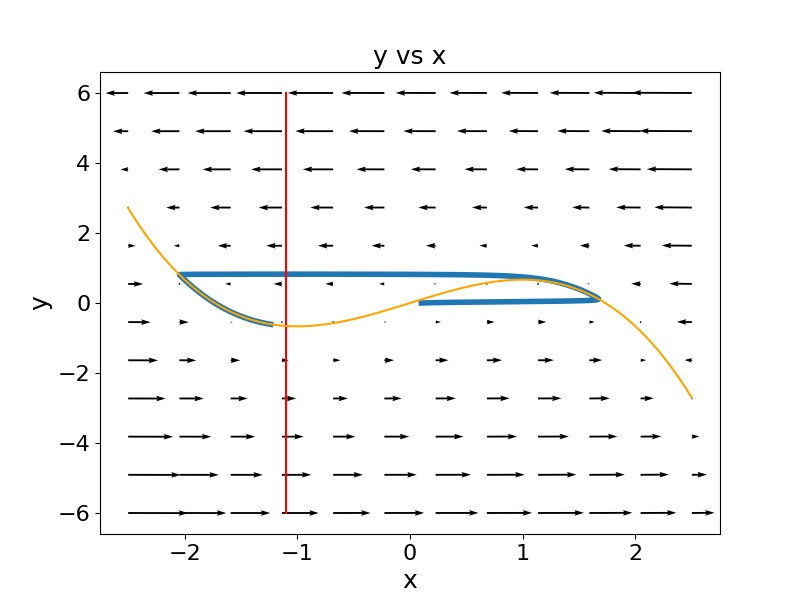

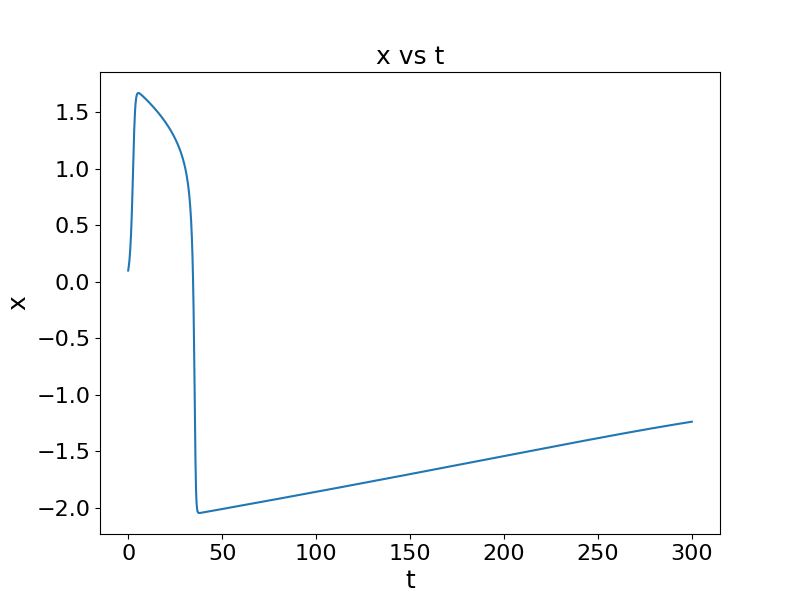

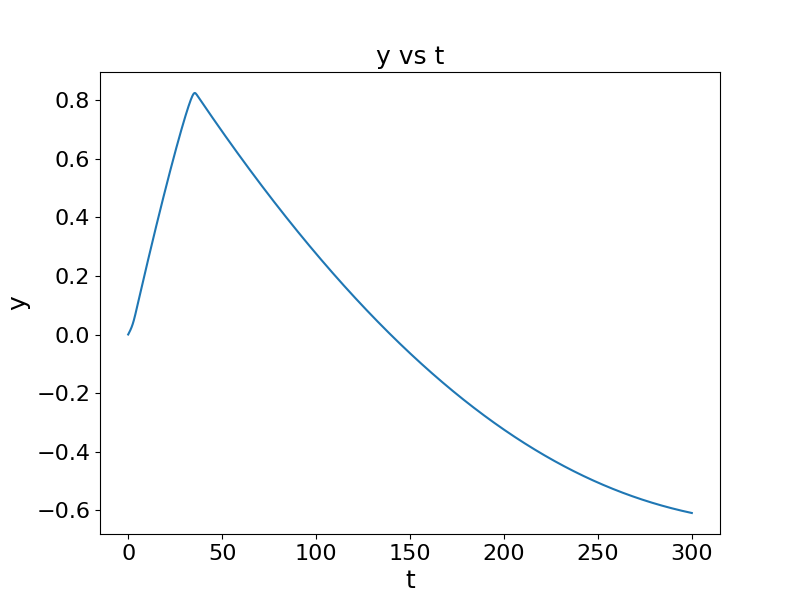

In [11]:
fig, ax = plt.subplots(figsize=(8,6))

x_array_arrow=np.linspace(-2.5,2.5,12)
y_array_arrow=np.linspace(-6,6,12)
x_grid_arrow, y_grid_arrow = np.meshgrid(x_array_arrow, y_array_arrow)
ax.plot(TR[1], TR[2],linewidth=4)
ax.plot(X,liny,c='r')
ax.plot(linx,Y,c='orange')
ax.grid(False)
ax.quiver(x_grid_arrow,y_grid_arrow,x_grid_arrow- x_grid_arrow**3/3 - y_grid_arrow,eps*(x_grid_arrow-a),scale=90,width=0.003)
ax.set_ylabel('y',fontsize=18)
ax.set_xlabel('x',fontsize=18)
ax.set_title('y vs x',fontsize=18)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
plt.show()


fig, ax = plt.subplots(figsize=(8,6))

ax.plot(TR[0],TR[1])
ax.grid(False)
ax.set_ylabel('x',fontsize=18)
ax.set_xlabel('t',fontsize=18)
ax.set_title('x vs t',fontsize=18)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
plt.show()


fig, ax = plt.subplots(figsize=(8,6))

ax.plot(TR[0],TR[2])
ax.grid(False)
ax.set_ylabel('y',fontsize=18)
ax.set_xlabel('t',fontsize=18)
ax.set_title('y vs t',fontsize=18)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 

plt.show()


